<a href="https://colab.research.google.com/github/NsiriRoua/DEEPCARTO/blob/main/DEEPCAROTO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
 import pandas as pd
 data=pd.read_csv('/content/drive/MyDrive/DEEPCARTO/archive/convertcsv.csv')

In [3]:
data.head(6)


,classes/title,classes/shape,classes/color
0,Water,polygon,#50E3C2
1,Land (unpaved area),polygon,#F5A623
2,Road,polygon,#DE597F
3,Building,polygon,#D0021B
4,Vegetation,polygon,#417505
5,Unlabeled,polygon,#9B9B9B


In [23]:
Water=[226, 169, 41]
Land=[132, 41, 246]
Road=[110, 193, 228]
Building=[60, 16, 152]
Vegetation=[254, 221, 58]
Unlabled=[155, 155, 155]


In [24]:
R=[226,132,110,60,254,155]
G=[169,41,193,16,221,155]
B=[41,246,228,152,58,155]

In [6]:
data['R']=R
data['G']=G

data['B']=B


In [7]:
data.drop(['classes/color','classes/shape'], axis=1, inplace=True)



In [8]:
data


,classes/title,R,G,B
0,Water,226,169,41
1,Land (unpaved area),132,41,246
2,Road,110,193,228
3,Building,60,16,152
4,Vegetation,254,221,58
5,Unlabeled,155,155,155


In [9]:
data.rename(columns={'classes/title':'name'},inplace=True)
data

,name,R,G,B
0,Water,226,169,41
1,Land (unpaved area),132,41,246
2,Road,110,193,228
3,Building,60,16,152
4,Vegetation,254,221,58
5,Unlabeled,155,155,155


In [10]:
import numpy as np
label_names= list(data.name)
label_codes = []
r= np.asarray(data.R)
g= np.asarray(data.G)
b= np.asarray(data.B)

for i in range(len(data)):
    label_codes.append(tuple([r[i], g[i], b[i]]))
    
label_codes, label_names

([(226, 169, 41),
  (132, 41, 246),
  (110, 193, 228),
  (60, 16, 152),
  (254, 221, 58),
  (155, 155, 155)],
 ['Water',
  'Land (unpaved area)',
  'Road',
  'Building',
  'Vegetation',
  'Unlabeled'])

In [11]:
#Useful Label & Code Conversion Dictionaries
code2id = {v:k for k,v in enumerate(label_codes)}
id2code = {k:v for k,v in enumerate(label_codes)}

name2id = {v:k for k,v in enumerate(label_names)}
id2name = {k:v for k,v in enumerate(label_names)}

In [12]:
name2id

{'Building': 3,
 'Land (unpaved area)': 1,
 'Road': 2,
 'Unlabeled': 5,
 'Vegetation': 4,
 'Water': 0}

In [13]:
id2code

{0: (226, 169, 41),
 1: (132, 41, 246),
 2: (110, 193, 228),
 3: (60, 16, 152),
 4: (254, 221, 58),
 5: (155, 155, 155)}

In [14]:
id2code

{0: (226, 169, 41),
 1: (132, 41, 246),
 2: (110, 193, 228),
 3: (60, 16, 152),
 4: (254, 221, 58),
 5: (155, 155, 155)}

In [15]:
import cv2
images_dir='/content/drive/MyDrive/DEEPCARTO/archive/train/train_images/'
masks_dir='/content/drive/MyDrive/DEEPCARTO/archive/train/train_masks/'

In [16]:
import os
import numpy as np
images_names = np.sort(os.listdir(images_dir)) 
len(images_names)

72

In [ ]:
masks_names = np.sort(os.listdir(masks_dir)) 
len(masks_names)

72

In [17]:
import os
file_names = np.sort(os.listdir(images_dir)) 
file_names = np.char.split(file_names, '.')
filenames = np.array([])
for i in range(len(file_names)):
    filenames = np.append(filenames, file_names[i][0])

In [18]:
image_dataset=[]
mask_dataset=[]
for file in filenames:
  image1 = cv2.imread(images_dir + file + '.jpg')
  image2 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
  image=cv2.resize(image2,(512,512)) 
  image_dataset.append(image)
  mask1 = cv2.imread(masks_dir + file + '.png')
  mask2 = cv2.cvtColor(mask1, cv2.COLOR_BGR2RGB)  
  mask=cv2.resize(mask2,(512,512)) 
  mask_dataset.append(mask)

In [19]:
import cv2
images_dir='/content/drive/MyDrive/DEEPCARTO/archive/real_dataset/patches/images/'
masks_dir='/content/drive/MyDrive/DEEPCARTO/archive/real_dataset/patches/masks/'

In [20]:
import os
images_names = np.sort(os.listdir(images_dir)) 
for name in images_names:
  image1 = cv2.imread(images_dir+name)
  image2 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
  image=cv2.resize(image2,(512,512)) 
  image_dataset.append(image)

In [ ]:
import os
masks_names = np.sort(os.listdir(masks_dir)) 
for name in masks_names:
  image1 = cv2.imread(masks_dir+name)
  image2 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
  image=cv2.resize(image2,(512,512)) 
  mask_dataset.append(image)

In [ ]:
image_dataset1=np.asarray(image_dataset)
mask_dataset1=np.asarray(mask_dataset)

In [ ]:
mask_dataset1[100]


array([[[155, 155, 155],
        [155, 155, 155],
        [155, 155, 155],
        ...,
        [110, 193, 228],
        [110, 193, 228],
        [110, 193, 228]],

       [[155, 155, 155],
        [155, 155, 155],
        [155, 155, 155],
        ...,
        [110, 193, 228],
        [110, 193, 228],
        [110, 193, 228]],

       [[155, 155, 155],
        [155, 155, 155],
        [155, 155, 155],
        ...,
        [110, 193, 228],
        [110, 193, 228],
        [110, 193, 228]],

       ...,

       [[155, 155, 155],
        [155, 155, 155],
        [155, 155, 155],
        ...,
        [155, 155, 155],
        [ 60,  16, 152],
        [ 60,  16, 152]],

       [[155, 155, 155],
        [155, 155, 155],
        [155, 155, 155],
        ...,
        [ 60,  16, 152],
        [ 60,  16, 152],
        [ 60,  16, 152]],

       [[155, 155, 155],
        [155, 155, 155],
        [155, 155, 155],
        ...,
        [155, 155, 155],
        [ 60,  16, 152],
        [ 60,  16, 152]]

In [ ]:

def rgb_to_onehot(rgb_arr, color_dict):
    num_classes = len(color_dict)
    shape = rgb_arr.shape[:2]+(num_classes,)
    arr = np.zeros( shape, dtype=np.int8 )
    for i, cls in enumerate(color_dict):
        arr[:,:,i] = np.all(rgb_arr.reshape( (-1,3) ) == color_dict[i], axis=1).reshape(shape[:2])
    return arr

In [ ]:
Building = '#3C1098'.lstrip('#')
Building = np.array(tuple(int(Building[i:i+2], 16) for i in (0, 2, 4)))

In [ ]:
Road = '#6EC1E4'.lstrip('#') 
Road = np.array(tuple(int(Road[i:i+2], 16) for i in (0, 2, 4))) #110, 193, 228

In [ ]:
Vegetation =  'FEDD3A'.lstrip('#') 
Vegetation = np.array(tuple(int(Vegetation[i:i+2], 16) for i in (0, 2, 4))) #254, 221, 58
Vegetation

array([254, 221,  58])

In [ ]:
Water = 'E2A929'.lstrip('#') 
Water = np.array(tuple(int(Water[i:i+2], 16) for i in (0, 2, 4))) #226, 169, 41

In [ ]:
Unlabeled=np.array([155,155,155])


Unlabeled

array([155, 155, 155])

In [ ]:
Land=np.array([132,41,246])
Land

array([132,  41, 246])

In [ ]:
label = []
for i in range(len(mask_dataset1)):
  label.append(mask_dataset1[i])

In [ ]:
def rgb_to_2D_label(label):
    """
    Suply ouR labale masks as input in RGB format. 
    Replace pixels with specific RGB values ...
    """
    label_seg = np.zeros(label.shape,dtype=np.uint8)
    label_seg [np.all(label == Building,axis=-1)] = 0
    label_seg [np.all(label==Road,axis=-1)] = 1
    label_seg [np.all(label==Vegetation,axis=-1)] = 2
    label_seg [np.all(label==Water,axis=-1)] = 3
    label_seg [np.all(label==Land,axis=-1)] = 4
    label_seg [np.all(label==Unlabeled,axis=-1)] = 5
  
    
    label_seg = label_seg[:,:,0]  #Just take the first channel, no need for all 3 channels
    return label_seg

In [ ]:
labels = []
for i in range(len(mask_dataset1)):
    label = rgb_to_2D_label(mask_dataset1[i])
    labels.append(label)    


In [ ]:
labels

[array([[4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        ...,
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4]], dtype=uint8), array([[4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        ...,
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4]], dtype=uint8), array([[4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        ...,
        [0, 4, 4, ..., 4, 4, 4],
        [0, 4, 4, ..., 4, 4, 4],
        [0, 4, 4, ..., 4, 4, 4]], dtype=uint8), array([[4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        ...,
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4]], dtype=uint8), array([[4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
 

In [ ]:
labels = np.array(labels)

In [ ]:
labels = np.expand_dims(labels, axis=3)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset1,labels, test_size = 0.20, random_state = 42)

In [ ]:
import tensorflow as tf

datagen = tf.keras.preprocessing.image.ImageDataGenerator()

In [ ]:
train_image_generator = datagen.flow(X_train,y_train,batch_size =8)

In [ ]:
val_image_generator = datagen.flow(X_test,y_test,batch_size =8)

In [ ]:
y_train.shape

(86, 512, 512, 1)

In [ ]:
n_classes = len(np.unique(labels))
n_classes

6

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=n_classes)
y_test = to_categorical(y_test, num_classes=n_classes)
#print(len(labels))

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, Nadam
from tensorflow.keras import applications, optimizers
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.applications.resnet50 import preprocess_input

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import model_to_dot, plot_model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, CSVLogger, LearningRateScheduler
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, ZeroPadding2D, Dropout

In [ ]:
train_images='C:/Users/SPIRIT/deepcarto_inception/aug_train/aug_images/'
val_images='C:/Users/SPIRIT/deepcarto_inception/aug_train/aug_masks/'

In [ ]:
len(X_train)

86

In [ ]:
import os
batch_size = 16
num_train_samples = len(X_train)
num_val_samples = len(X_test)
steps_per_epoch = np.ceil(float(num_train_samples) / float(batch_size))
print('steps_per_epoch: ', steps_per_epoch)
validation_steps = np.ceil(float(4 * num_val_samples) / float(batch_size))
print('validation_steps: ', validation_steps)

steps_per_epoch:  6.0
validation_steps:  6.0


In [ ]:
def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

def decoder_block(input, skip_features, num_filters):
    
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

def build_inception_resnetv2_unet(input_shape):

    inputs = Input(input_shape)

    encoder = InceptionResNetV2(include_top=False, weights="imagenet", input_tensor=inputs)


    s1 = encoder.get_layer("input_1").output           ## (512 x 512)

    s2 = encoder.get_layer("activation").output        ## (255 x 255)
    s2 = ZeroPadding2D(( (1, 0), (1, 0) ))(s2)         ## (256 x 256)

    s3 = encoder.get_layer("activation_3").output      ## (126 x 126)
    s3 = ZeroPadding2D((1, 1))(s3)                     ## (128 x 128)

    s4 = encoder.get_layer("activation_74").output      ## (61 x 61)
    s4 = ZeroPadding2D(( (2, 1),(2, 1) ))(s4)           ## (64 x 64)

  
    b1 = encoder.get_layer("activation_161").output     ## (30 x 30)
    b1 = ZeroPadding2D((1, 1))(b1)                      ## (32 x 32)

   
    d1 = decoder_block(b1, s4, 512)                     ## (64 x 64)
    d2 = decoder_block(d1, s3, 256)                     ## (128 x 128)
    d3 = decoder_block(d2, s2, 128)                     ## (256 x 256)
    d4 = decoder_block(d3, s1, 64)                      ## (512 x 512)
    
   
    dropout = Dropout(0.3)(d4)
    outputs = Conv2D(6, 1, padding="same", activation="softmax")(dropout)

    model = Model(inputs, outputs, name="InceptionResNetV2-UNet")
    return model

In [ ]:
K.clear_session()

def dice_coef(y_true, y_pred):
    return (2. * K.sum(y_true * y_pred) + 1.) / (K.sum(y_true) + K.sum(y_pred) + 1.)


In [ ]:
model = build_inception_resnetv2_unet(input_shape = (512, 512, 3))

219070464/219055592 [==============================] - 2s 0us/step


In [ ]:
model.compile(optimizer=Adam(learning_rate= 0.0001), loss='categorical_crossentropy', metrics=[dice_coef,"accuracy"])

In [ ]:
model.summary()

In [ ]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.0001, 60)

lr_scheduler = LearningRateScheduler(
    exponential_decay_fn,
    verbose=1
)

checkpoint = ModelCheckpoint(
    filepath = 'InceptionResNetV2-UNet.h5',
    save_best_only = True, 
#     save_weights_only = False,
    monitor = 'val_loss', 
    mode = 'auto', 
    verbose = 1
)

earlystop = EarlyStopping(
    monitor = 'val_loss', 
    min_delta = 0.001, 
    patience = 12, 
    mode = 'auto', 
    verbose = 1,
    restore_best_weights = True
)

csvlogger = CSVLogger(
    filename= "model_training.csv",
    separator = ",",
    append = False
)

callbacks = [checkpoint, earlystop, csvlogger, lr_scheduler]

In [ ]:
history=model.fit(X_train,y_train,batch_size=4,epochs=50,steps_per_epoch=10,callbacks=callbacks,validation_steps=50,validation_data=[X_test,y_test])


Epoch 00001: LearningRateScheduler setting learning rate to 0.0001.
Epoch 1/50
10/10 [==============================] - 26s 3s/step - loss: 1.6792 - dice_coef: 0.3285 - accuracy: 0.4327 - lr: 1.0000e-04

Epoch 00002: LearningRateScheduler setting learning rate to 9.623506263980886e-05.
Epoch 2/50
10/10 [==============================] - 26s 3s/step - loss: 1.5990 - dice_coef: 0.3527 - accuracy: 0.4725 - lr: 9.6235e-05

Epoch 00003: LearningRateScheduler setting learning rate to 9.261187281287936e-05.
Epoch 3/50
10/10 [==============================] - 33s 3s/step - loss: 1.3936 - dice_coef: 0.3909 - accuracy: 0.5457 - lr: 9.2612e-05

Epoch 00004: LearningRateScheduler setting learning rate to 8.912509381337456e-05.
Epoch 4/50
10/10 [==============================] - 25s 3s/step - loss: 1.3773 - dice_coef: 0.4048 - accuracy: 0.5321 - lr: 8.9125e-05

Epoch 00005: LearningRateScheduler setting learning rate to 8.576958985908941e-05.
Epoch 5/50
10/10 [==============================] - 24s

In [ ]:
import pandas as pd
df_result = pd.DataFrame(history.history)
df_result

,loss,dice_coef,accuracy,lr
0,1.649963,0.318682,0.425254,0.000100
1,1.410282,0.382589,0.521239,0.000096
2,1.404422,0.392497,0.522210,0.000093
3,1.588774,0.346361,0.439509,0.000089
4,1.277316,0.411217,0.560978,0.000086
5,1.438487,0.386638,0.497609,0.000083
6,1.346111,0.413877,0.540213,0.000079
7,1.296903,0.416329,0.550830,0.000076
8,1.234255,0.432588,0.566442,0.000074
9,1.243044,0.437381,0.552162,0.000071


KeyError: ignored

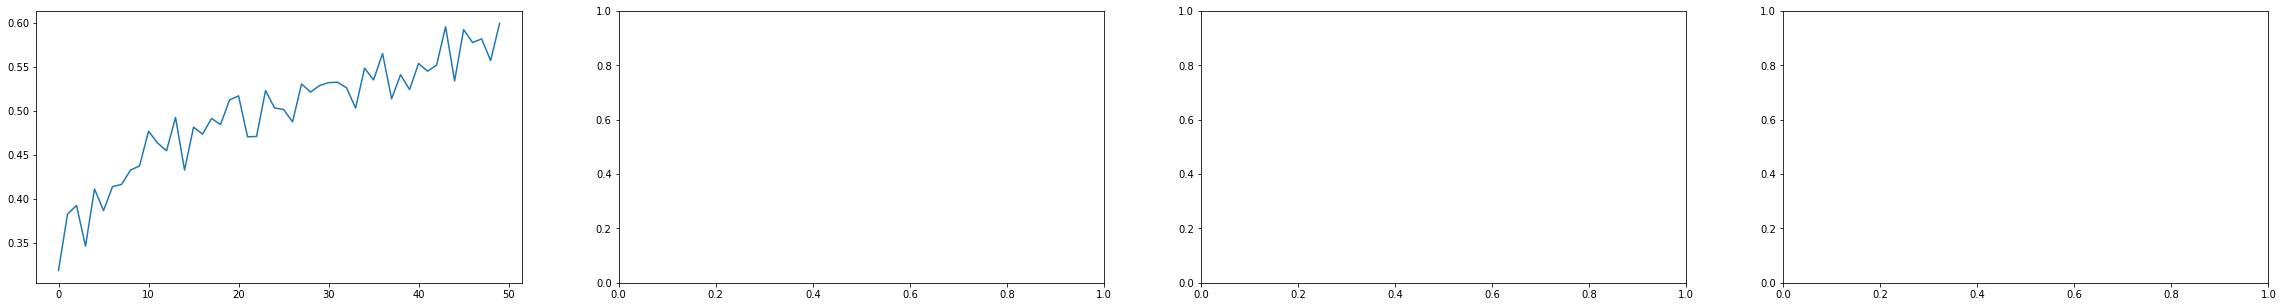

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 4, figsize=(40, 5))
ax = ax.ravel()
metrics = ['Dice Coefficient', 'Accuracy', 'Loss', 'Learning Rate']

for i, met in enumerate(['dice_coef', 'accuracy', 'loss', 'lr']): 
    if met != 'lr':
        ax[i].plot(history.history[met])
        ax[i].plot(history.history['val_' + met])
        ax[i].set_title('{} vs Epochs'.format(metrics[i]), fontsize=16)
        ax[i].set_xlabel('Epochs')
        ax[i].set_ylabel(metrics[i])
        ax[i].set_xticks(np.arange(0,45,4))
        ax[i].legend(['Train', 'Validation'])
        ax[i].xaxis.grid(True, color = "lightgray", linewidth = "0.8", linestyle = "-")
        ax[i].yaxis.grid(True, color = "lightgray", linewidth = "0.8", linestyle = "-")
    else:
        ax[i].plot(history.history[met])
        ax[i].set_title('{} vs Epochs'.format(metrics[i]), fontsize=16)
        ax[i].set_xlabel('Epochs')
        ax[i].set_ylabel(metrics[i])
        ax[i].set_xticks(np.arange(0,45,4))
        ax[i].xaxis.grid(True, color = "lightgray", linewidth = "0.8", linestyle = "-")
        ax[i].yaxis.grid(True, color = "lightgray", linewidth = "0.8", linestyle = "-")
        
plt.savefig('model_metrics_plot.png', facecolor= 'w',transparent= False, bbox_inches= 'tight', dpi= 150)

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/DEEPCARTO/model/model')

OSError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#IOU
y_pred=model.predict(X_test)
y_pred_argmax=np.argmax(y_pred, axis=3)
y_test_argmax=np.argmax(y_test, axis=3)

In [ ]:
from keras.metrics import MeanIoU
n_classes = 6
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_test_argmax, y_pred_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.47738394


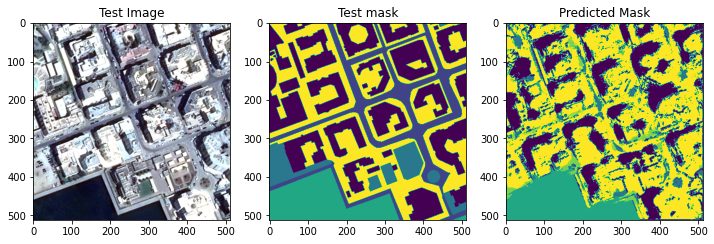

In [ ]:
#Predict on a few images

import random
#test_img_number = random.randint(0,len(X_test))
test_img = X_test[8]
ground_truth=y_test_argmax[8]
#test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img, 0)
prediction = (model.predict(test_img_input))
predicted_img=np.argmax(prediction, axis=3)[0,:,:]

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Test Image')
plt.imshow(test_img)
plt.subplot(232)
plt.title('Test mask')
plt.imshow(ground_truth)
plt.subplot(233)
plt.title('Predicted Mask')
plt.imshow(predicted_img)
plt.show()

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img=cv2.imread('/content/drive/MyDrive/DEEPCARTO/archive/real_dataset/tunis_lac/raster_tunis_lac.tif')
#img=cv2.resize(img,(512,512))
cv2_imshow(img)

AttributeError: ignored

In [ ]:
img

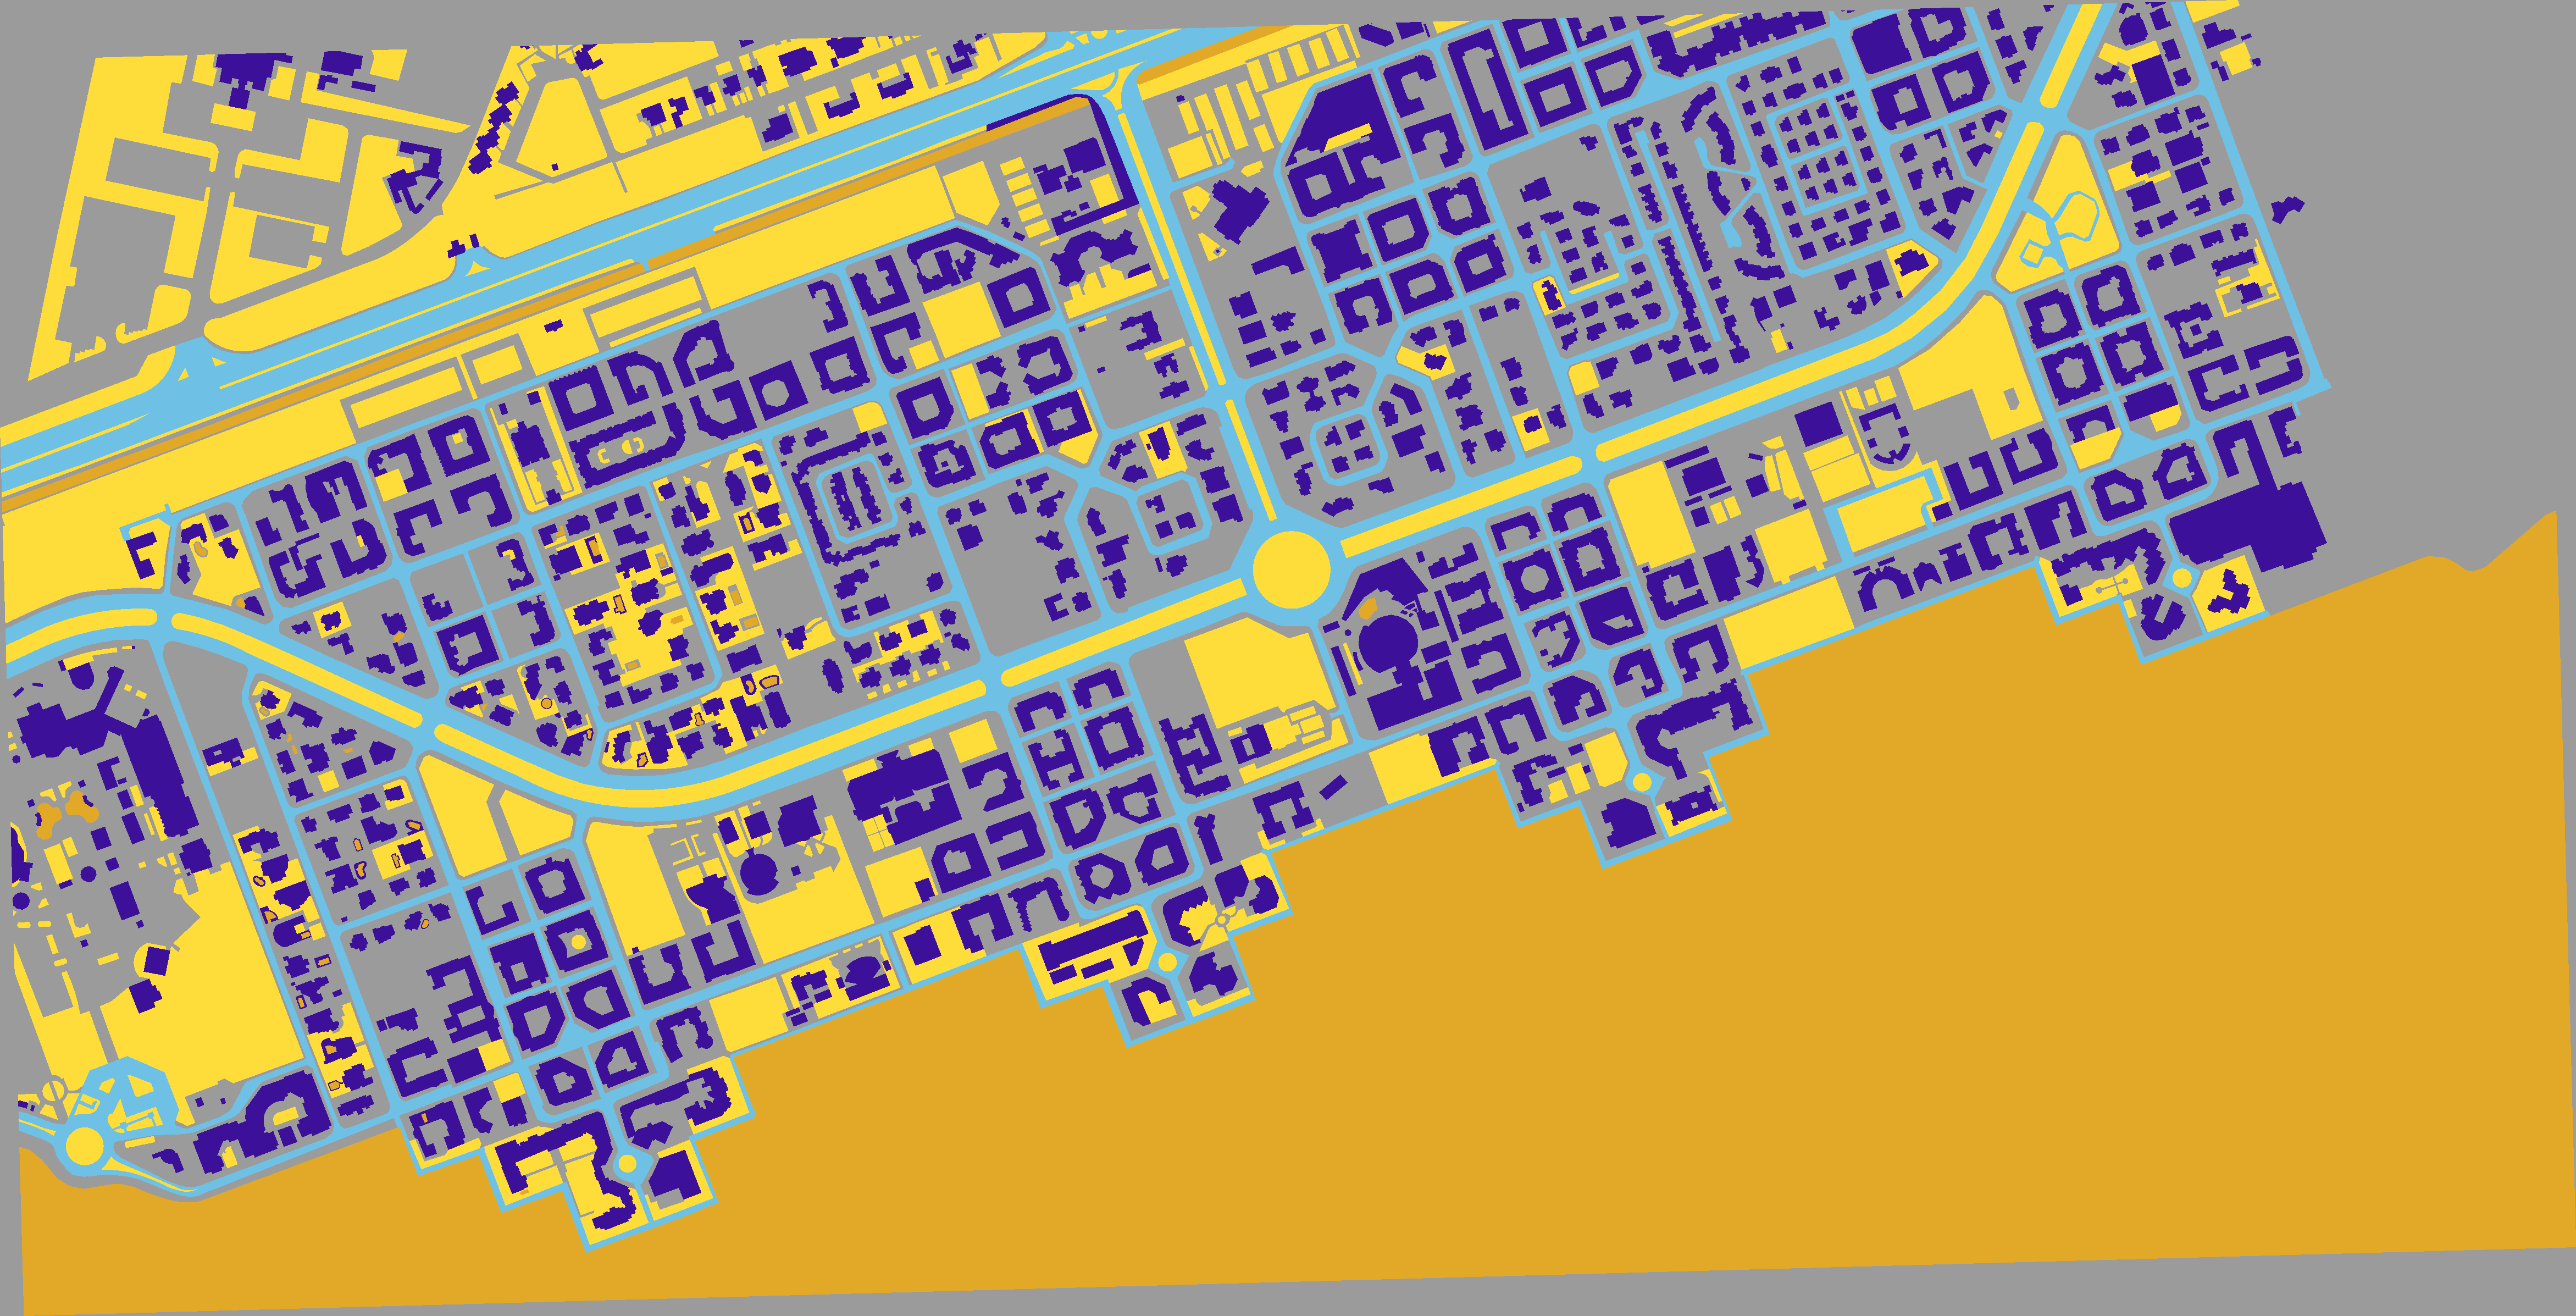

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
mask=cv2.imread('/content/drive/MyDrive/DEEPCARTO/archive/real_dataset/tunis_lac/tunis_lac_classes_raster3.png')
#mask=cv2.resize(mask,(512,512))
cv2_imshow(mask)

In [ ]:
#y_test_argmax=np.argmax(mask, axis=3)

AxisError: ignored

In [ ]:
test_img_input=np.expand_dims(img, 0)
prediction = (model.predict(test_img_input))
predicted_img=np.argmax(prediction, axis=3)[0,:,:]

ValueError: ignored

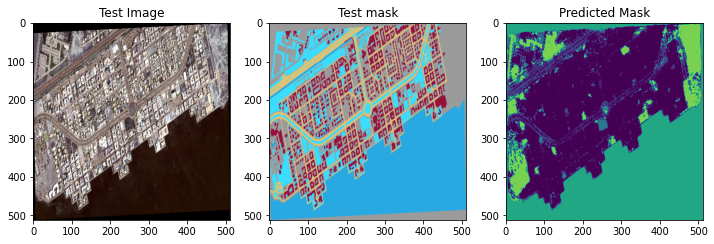

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Test Image')
plt.imshow(img)
plt.subplot(232)
plt.title('Test mask')
plt.imshow(mask)
plt.subplot(233)
plt.title('Predicted Mask')
plt.imshow(predicted_img)
plt.show()

In [ ]:
X_train = tf.stack(X_train)
y_train = tf.stack(y_train)

In [ ]:
X_test = tf.stack(X_test)
y_test = tf.stack(y_test)

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1" 

In [ ]:
import tensorflow as tf
print(tf.GIT_VERSION, tf.VERSION)

AttributeError: module 'tensorflow' has no attribute 'GIT_VERSION'

In [ ]:
history1 = model.fit(X_train,y_train, 
                    verbose=1, 
                    epochs=50,
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,
                    validation_data=(X_test,y_test), 
                    shuffle=False)

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.